# Regression Exercises

## Linear

In [19]:
# Loading data
import numpy as np
from matplotlib import pyplot as plt

# Read data from GitHub
data_url = "https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week1/portland_housing.txt"
data_array = np.genfromtxt(data_url, delimiter=',')

# The columns in this dataset are defined as follows:
"""
    0 = floor area
    1 = number of bedrooms
    2 = sale price
"""
    
# Store the relevant columns in more descriptive variables
x_sqft = data_array[:,0]
y_value = data_array[:,2]

Here we'll build off of the tutorial and first find the best linear fit for floor area (sqft) vs. valued price (USD). Recall that setting the derivative = 0 and solving for $b$ & $m$ produces the formula for the best fit trend:

### $$ m = \frac{\sum^n_{i=1} (x_i-x_{mean})(y_i-y_{mean})}{\sum^n_{i=1} (x_i-x_{mean})^2} $$
### $$ b = y_{mean}-m*x_{mean} $$

In [21]:
def find_best_fit(xx,yy):
    '''
      This function finds the best linear fit for yy vs xx
    '''
    
    m = np.sum((xx - np.mean(xx)) * (yy - np.mean(yy))) / np.sum((xx - np.mean(xx))**2)
    b = np.mean(yy) - m * np.mean(xx)

    return m, b

In [9]:
# Use your function to show the best fit values for our data
(mm, bb) = find_best_fit(x_sqft, y_value)
fit_str = 'y = {aa:.1f}x + {bb:.1f}'
print(fit_str.format(aa=mm,bb=bb))

y = 134.5x + 71270.5


Now that we have the best fit trend line that minimizes total error for our data, let's try plotting it and see what it looks like. Since it's just an equation, we need to _sample_ the curve in order to plot it.

To do this, we'll find the difference between the largest and smallest floor area and divide it into 100 sample points.

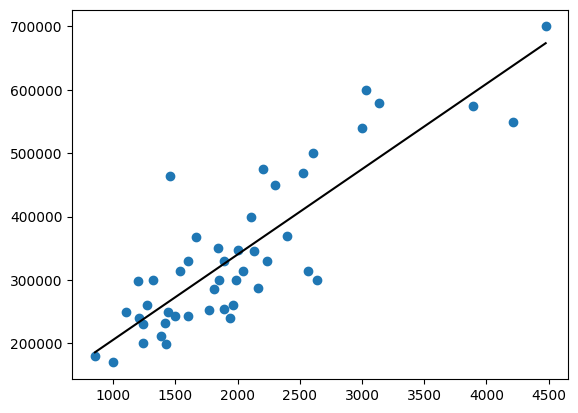

In [24]:
# Plot the data
plt.scatter(x_sqft, y_value)

# Sample the range from minimum to maximum sqft to get 100 points
sx = np.arange(np.min(x_sqft), np.max(x_sqft))
# Apply the best fit equation to each sample point and plot the result

plt.plot(sx, mm * sx + bb, c='black')

1: Given these parameters, how much should a house with 1600 sqft cost?

In [25]:
mm * 1600 + bb

286510.9528011152

> Answer: Around $286,510.

2: From the dataset, how much did a house with 1600 sqft actually cost?

In [30]:
i = np.where(x_sqft == 1600)
y_value[i]

array([329900.])

> Answer: $329,900

3: Assuming the current 1600 sqft house would sell for as much as the historical one, how much money would we have lost? What percentage of the total price is this?

In [39]:
d = 329900 - 286510.9528011152 
print(d)
print(f"{d / y_value[i][0] * 100:.2f}%")

43389.04719888477
13.15%


> Answer: $43,389, 13.15%

Let's compare the $m$ and $b$ values that sklearn generated in the tutorial with the values that you found just now with your function. Hopefully they match.

In [40]:
print("Sklearn:",134.52528772, 71270.492448729)
print("My function:",mm,bb)

Sklearn: 134.52528772 71270.492448729
My function: 134.52528772024135 71270.49244872906


Remember how despite adding an entire new variable, the $R^2$ value barely increased? Let's investigate this further by finding the correlation ($R^2$) value for a regression of square footage vs. number of bedrooms.

In [47]:
import sklearn.linear_model as lm

num_bedroom = data_array[:,1]
model = lm.LinearRegression()
model.fit(x_sqft.reshape(-1, 1), num_bedroom)
model.score(x_sqft.reshape(-1, 1), num_bedroom)

# YOUR CODE HERE

0.3135632699338188

Do 2 variables have to be very correlated to reduce their effectiveness together?

> Answer: The more correlated the two variables are, the R^2 is higher.

## Logistic

We are going to predict wheter or not someone has breast cancer using Logistic Regression on `sklearn`'s breast cancer dataset. It is up to you to decide what features to get the best results.

In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
X_cols = data['data'] # <-- Define
Y_cols = data['target'] # <-- Define
print(X_cols)
print(Y_cols)

model = LogisticRegression()
model.fit(X_cols, Y_cols)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

LogisticRegression()

Test your logistic regression! You must get an accuracy of > 80%.

In [52]:
from sklearn.metrics import accuracy_score

y_val_pred = model.predict(X_cols)
y_val = Y_cols

print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100) # Do your variable names line up?

Validation Accuracy is  94.72759226713534


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0cca5f50-39f8-471d-8735-226387513f26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>